In [3]:
import pandas as pd
import descarteslabs as dl
import matplotlib.pyplot as plt
from osgeo import gdal
import os
import numpy as np
import json
import datetime
import warnings
# warn this
warnings.filterwarnings('ignore')

### Build your own GeoJSON!
It's fun!

http://geojson.io/

In [4]:
smith_river = {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -124.14482116699219,
              41.751592536486534
            ],
            [
              -123.96835327148436,
              41.751592536486534
            ],
            [
              -123.96835327148436,
              41.88362062793374
            ],
            [
              -124.14482116699219,
              41.88362062793374
            ],
            [
              -124.14482116699219,
              41.751592536486534
            ]
          ]
        ]
      }

In [5]:
scenes, ctx = dl.scenes.search(smith_river,
                    products=["sentinel-2:L1C"],
                    start_datetime="2016-03-20",
                    cloud_fraction=0.05,
                    limit=1000
                   )

https://docs.descarteslabs.com/descarteslabs/scenes/readme.html

In [6]:
scenes

SceneCollection of 132 scenes
  * Dates: May 08, 2016 to Dec 02, 2018
  * Products: sentinel-2:L1C: 132

In [7]:
scenes.each.properties.id

'sentinel-2:L1C:2016-05-08_10TCM_54_S2A_v1'
'sentinel-2:L1C:2016-05-08_10TDM_99_S2A_v1'
'sentinel-2:L1C:2016-05-28_10TCM_54_S2A_v1'
'sentinel-2:L1C:2016-05-28_10TDM_99_S2A_v1'
'sentinel-2:L1C:2016-06-30_10TCM_99_S2A_v1'
'sentinel-2:L1C:2016-06-30_10TDM_42_S2A_v1'
'sentinel-2:L1C:2016-07-20_10TCM_99_S2A_v1'
'sentinel-2:L1C:2016-07-20_10TDM_42_S2A_v1'
...

In [8]:
scenes[0].properties

{
  'absolute_orbit': 4586,
  'acquired': '2016-05-08T19:12:42.388Z',
  'archived': '2016-05-10T14:47:46.735409Z',
  'area': 6628.4,
  'azimuth_angle': 103.647754,
  'azimuth_angle_1': 104.958722,
  'bands': {
    'alpha': {
      'color': 'Alpha',
      'data_description': '0: nodata, 1: valid data',
      'data_range': [0, 1],
      'data_unit_description': 'unitless',
      'default_range': [0, 1],
      'description': 'Alpha (valid data)',
      'dtype': 'UInt16',
      'id': 'sentinel-2:L1C:alpha',
      'jpx_layer': 1,
      'name': 'alpha',
      'name_common': 'alpha',
      'nbits': 1,
      'nodata': None,
      'owner_type': 'core',
      'product': 'sentinel-2:L1C',
      'res_factor': 1,
      'resolution': 10,
      'resolution_unit': 'm',
      'srcband': 1,
      'srcfile': 0,
      'tags': ['mask', 'alpha', '10m', 'sentinel-2'],
      'type': 'mask'
    },
    'blue': {
      'color': 'Blue',
      'data_description': 'TOAR, 0-10000 is 0 - 100% reflective',
      'data

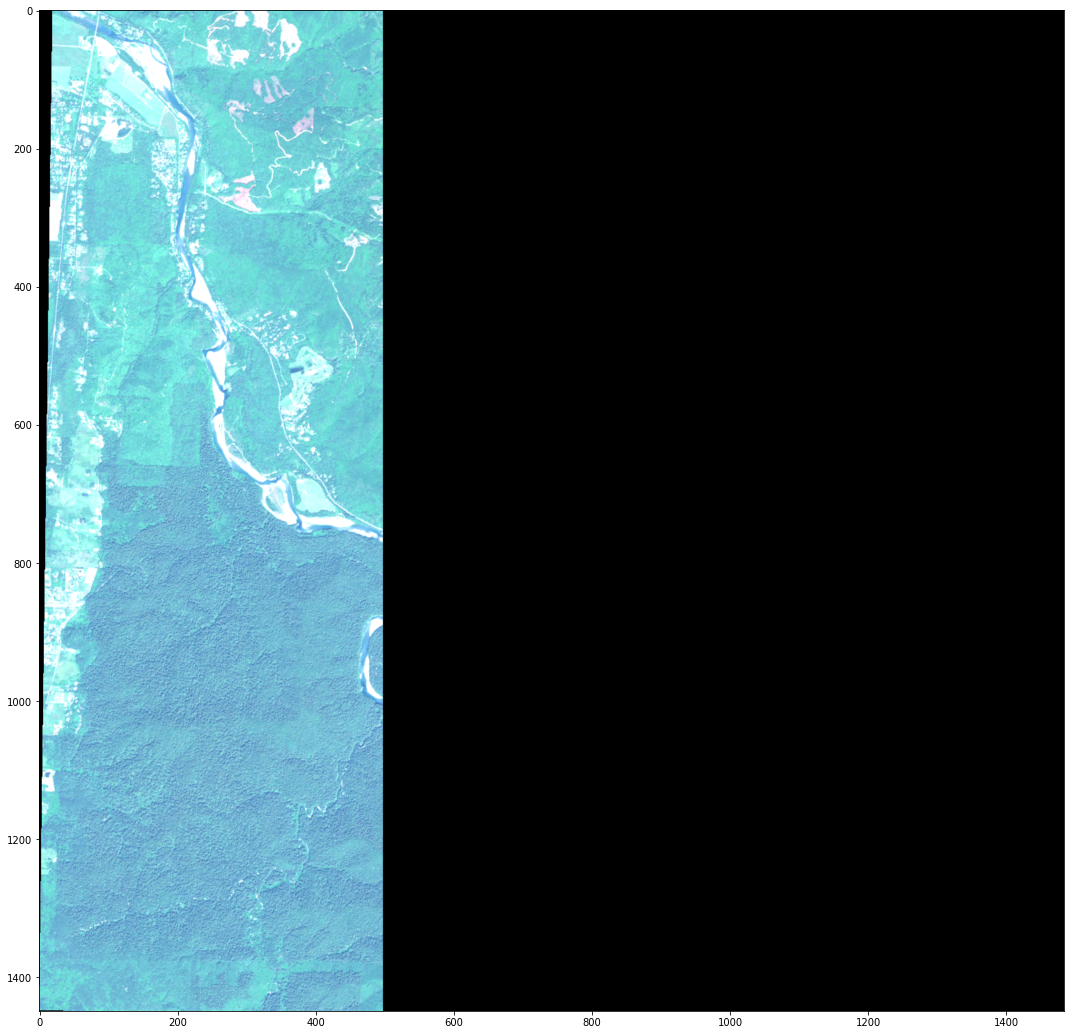

In [10]:
lowres_context = ctx.assign(resolution=10)
arr = scenes[2].ndarray("red green blue", lowres_context, mask_alpha=False)
dl.scenes.display(arr, size=15)

In [11]:
filtered_scenes = scenes.filter_coverage(ctx, 0.75)

In [13]:
len(filtered_scenes)

69

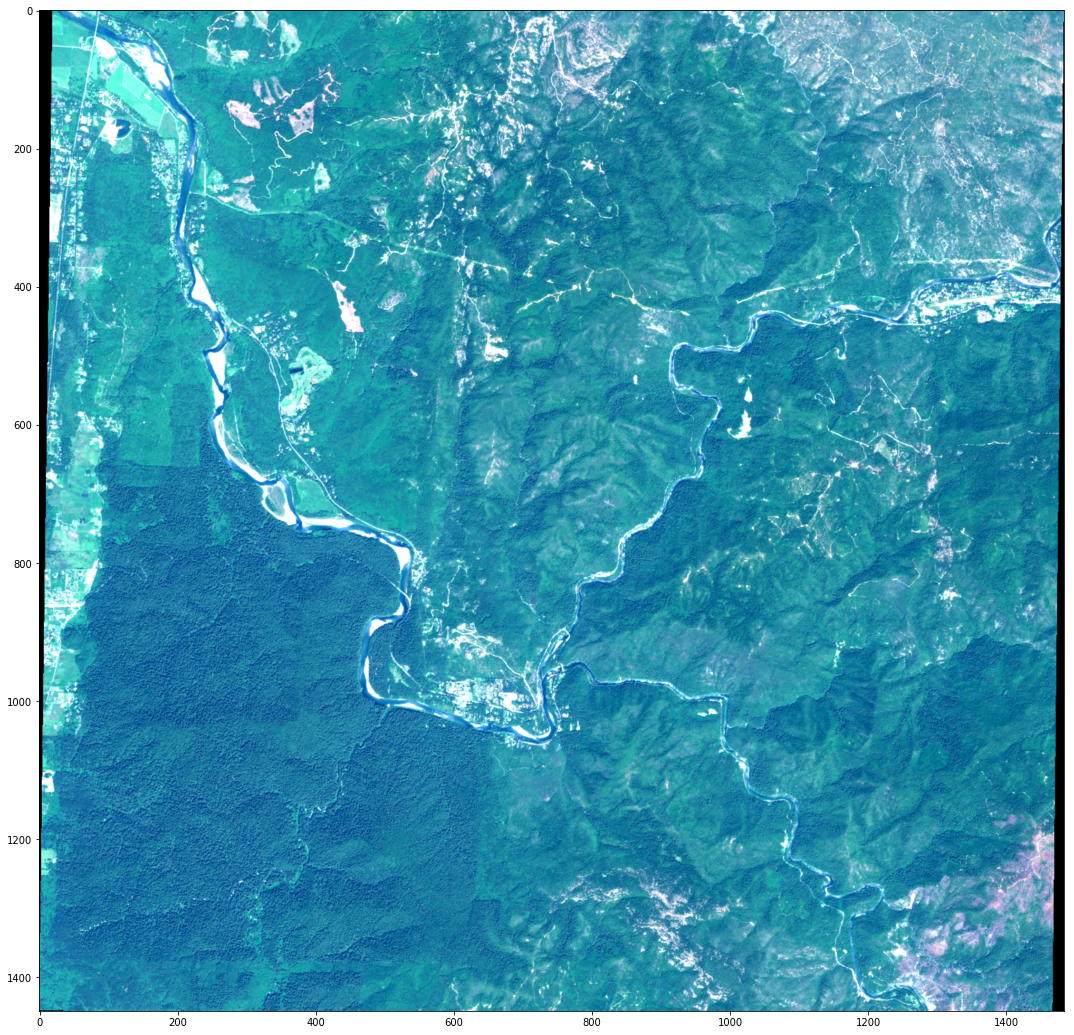

In [15]:
arr = filtered_scenes[10].ndarray("red green blue", lowres_context, mask_alpha=False)
dl.scenes.display(arr, size=15)

In [7]:
scene, ctx = dl.scenes.Scene.from_id(filtered_scenes[10].properties.id)

In [8]:
lowres_context = ctx.assign(resolution=10)

AOI(geometry=None,
    resolution=10,
    crs='EPSG:32610',
    align_pixels=True,
    bounds=(-124.21648331497742, 41.45751520584924, -123.45575520910316, 42.4517851408154),
    shape=None)

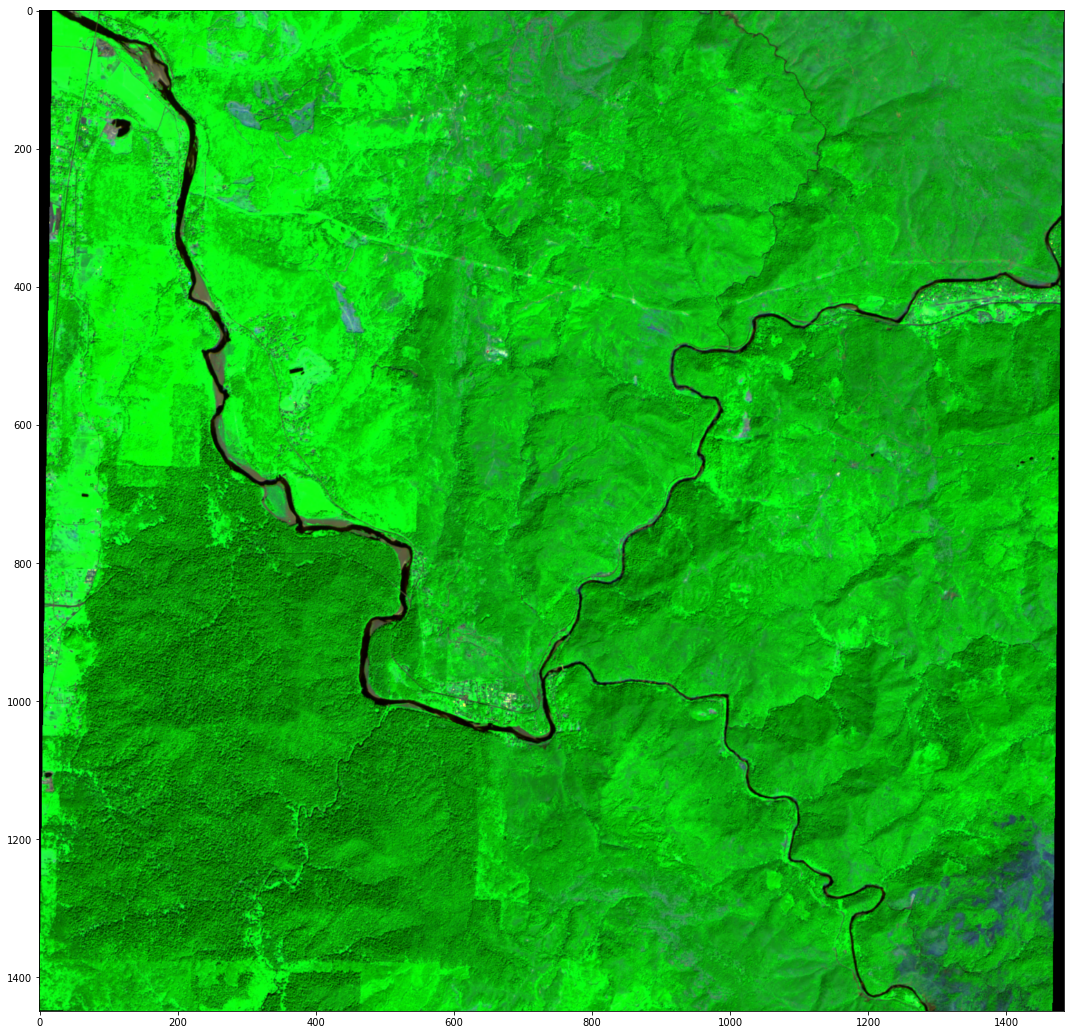

In [16]:
arr = filtered_scenes[10].ndarray("red nir swir2", lowres_context, mask_alpha=False)
dl.scenes.display(arr, size=15)

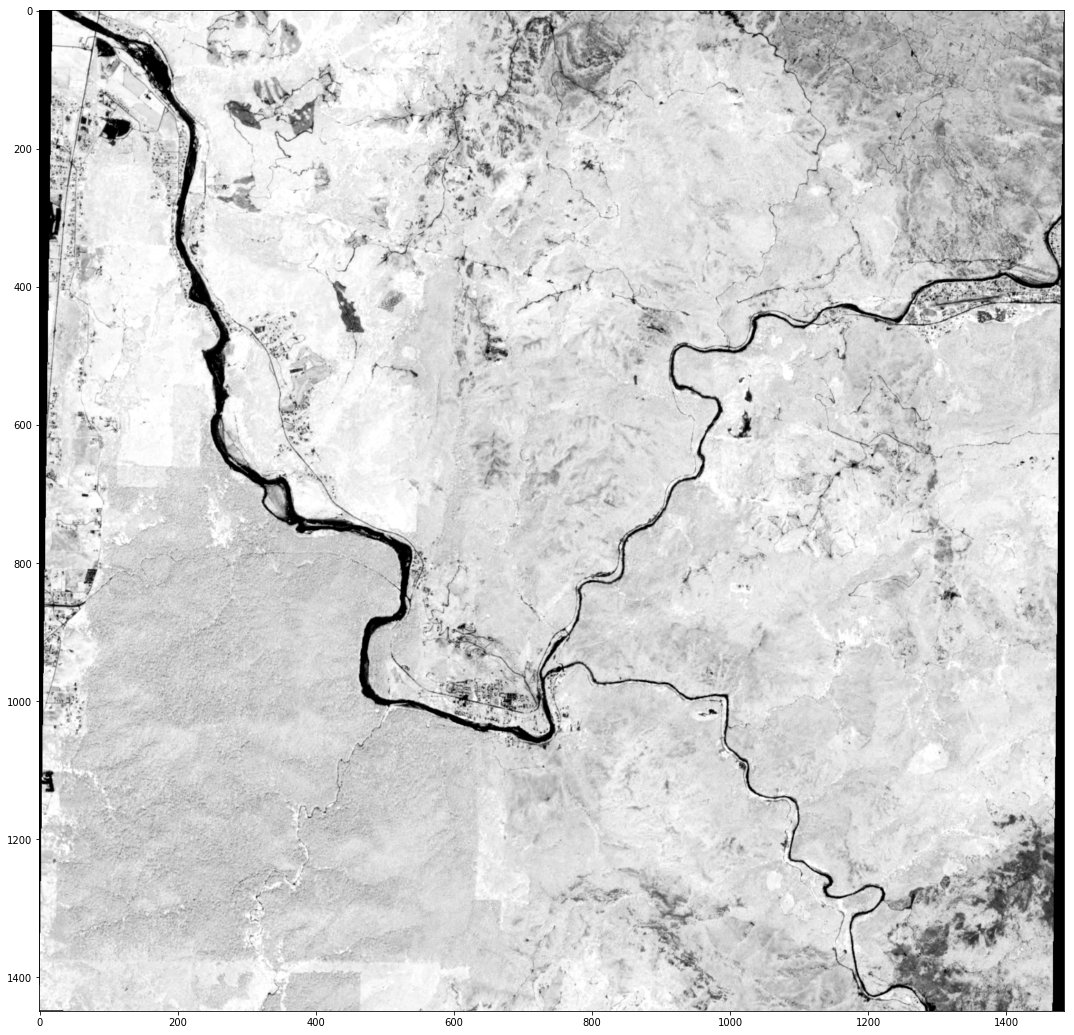

In [18]:
arr = filtered_scenes[10].ndarray("derived:ndvi", lowres_context, mask_alpha=False)
dl.scenes.display(arr, size=15)

In [ ]:
images = []
images.append(filtered_scenes[10].properties.id)

for image in images:
    raster_client = dl.Raster()
    raster_client.raster(
        inputs=image,
        bands=['red', 'green', 'blue'],
        scales=[[0, 5000]],
        data_type='Float64',
        cutline=smith_river,
        save=True,
        outfile_basename="tutorial_%s" % image,
        resolution=10